# **Github Programming Language Predictor**
##### **using Natural Language Processing**
<p align ="right">Zacharia Schmitz <br>
Aswathy Radha<br>
Joshua Click<br>
October 2023

---


### Rate Limits & Ethics:

Scraping

[**From GitHub Acceptable Use Policies**](https://docs.github.com/en/github/site-policy/github-acceptable-use-policies)

>"Short version: We host a wide variety of collaborative projects from all over the world, and that collaboration only works when our users are able   >to work together in good faith. While using the Service, you must comply with our Acceptable Use Policies, which include some restrictions on content >and conduct on GitHub related to user safety, intellectual property, privacy, authenticity, and other limitations. In short, be excellent to each
>other.

In [1]:
import requests
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacschmitz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

### We'll pull 100 README pages from each language and analyze each one individually.

1. Decide Languages

2. Acquire Repos

3. Data Cleaning

4. Text Preprocessing

5. Feature Extraction

6. Model Training

7. Reusable Functionality

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

### The `fetch_readmes` function does the following:

<u>Web Scraping</u>

  * Initializes an empty list called `all_readmes` and a set called `processed_repos`.

  * Loops through each language in the `languages` list.

  * Prints a message indicating that it is processing repositories for the current language.

  * Initializes the `page` and `total_processed` variables to the values of `start_page` and 0, respectively.

  * Loops through the pages of the GitHub search results until it has fetched the desired number of README files.

<u>API Usage</u>

  * Calls the `fetch_github_data` function to fetch data from the GitHub API endpoint.

  * Calls the `extract_repo_links` function to extract repository links from the JSON response.

  * Loops through the repository links and calls the `get_readme_content` function to get the content of the README file.

  * If the README content is not `None`, it appends a tuple containing the language, repository URL, and README content to the `all_readmes` list and increments the `total_processed` variable.
  
  * Adds a delay between requests using the `time.sleep` function.
  
  * If the number of repositories to fetch is greater than 10 and the current page is less than or equal to the number of repositories divided by 10, it fetches additional pages of search results.
  
  * Prints a message indicating that it has finished processing repositories for the current language and the total number of README files fetched.
  
  * Converts the `all_readmes` list to a pandas DataFrame and returns it.

### Run this to Check GitHub Rate Limits Before Pulling

In [2]:
# Check current rate limit with GitHub (does not count towards limit)

response = requests.get("https://api.github.com/rate_limit")
response.json()

{'resources': {'core': {'limit': 60,
   'remaining': 56,
   'reset': 1698167151,
   'used': 4,
   'resource': 'core'},
  'graphql': {'limit': 0,
   'remaining': 0,
   'reset': 1698170620,
   'used': 0,
   'resource': 'graphql'},
  'integration_manifest': {'limit': 5000,
   'remaining': 5000,
   'reset': 1698170620,
   'used': 0,
   'resource': 'integration_manifest'},
  'search': {'limit': 10,
   'remaining': 10,
   'reset': 1698167080,
   'used': 0,
   'resource': 'search'}},
 'rate': {'limit': 60,
  'remaining': 56,
  'reset': 1698167151,
  'used': 4,
  'resource': 'core'}}

### Gather Repos

```python

fetch_readmes(languages=["python"], num_repos=5, start_page=1, sleep_time=1, verbose=True)

```

**Parameters:**

- `languages (list)`: A list of programming languages to search for.

- `num_repos (int)`: The number of repositories to fetch README files from.

- `start_page (int)`: The page number to start searching from.

- `sleep_time (int)`: The number of seconds to wait between requests.

- `verbose (bool)`: Whether to print progress messages.

### Takeaways from Scraping/API

- Trying to run all 800 at once, we kept failing for different reasons, so we broke it up, and cached each language as we went.

- With 1 second sleeps on 100 requests, we got a 429 status error (too many requests at 42 fetches)
    - We'll have to either chunk it into less pages, or increase sleeps<br><br>

- With 5 second sleeps, 100 repos took 10 minutes 11 seconds total.

- With 2 second sleeps, it took 5:30 and we did not get rate limited.

- Originally we tried 10 of each language, but the sample size seemed too small.

```python

base_url = "https://github.com/search?q=stars%3A%3E0+language%3A{language}&type=repositories&l={language}&p={page}"

```

```python

# Scrape Javascript
javascript = fetch_readmes(languages=['javascript'], num_repos=100, verbose=True, sleep_time=5)
javascript.to_csv('support_files/javascript_readmes.csv')

# Scrape Python
python = fetch_readmes(languages=['python'], num_repos=100, verbose=True, sleep_time=2)
python.to_csv('support_files/python_readmes.csv')

# Scrape Java
java = fetch_readmes(languages=['java'], num_repos=100, verbose=True, sleep_time=2)
java.to_csv('support_files/java_readmes.csv')

# Scrape HTML
html = fetch_readmes(languages=['html'], num_repos=100, verbose=True)
html.to_csv('support_files/html_readmes.csv')

# Scrape C++
cplus = fetch_readmes(languages=['c++'], num_repos=100, verbose=True)
cplus.to_csv('support_files/cplus_readmes.csv')

# Scrape Ruby
ruby = fetch_readmes(languages=['ruby'], num_repos=100, verbose=True)
ruby.to_csv('support_files/ruby_readmes.csv')

# Scrape Go
go = fetch_readmes(languages=['go'], num_repos=100, verbose=True)
go.to_csv('support_files/go_readmes.csv')

# Scrape TypeScript
typescript = fetch_readmes(languages=['typescript'], num_repos=100, verbose=True)
typescript.to_csv('support_files/typescript_readmes.csv')

```

```python

# Combine them all
df = pd.concat([javascript, python, java, html, cplus, ruby, go, typescript])

# Cache the CSV for future usage
df.to_csv('support_files/read_mes_17oct.csv', index=False)

```

**<u>ALL REPOS PULLED OCTOBER 17th FROM 12:00 to 15:39 (CST)**

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

1. Data Cleaning: 
2. Text Preprocessing:

`language`: The target variable indicating the programming language of the repository.
    
- 10 different programming languages (C++, C#, Go, Java, Javascript, PHP, Python, R, Ruby, Swift)

`repo`: The repository's path/name.

- 100 unique repositories for each of the languages above

`readme`: The content of the repository's README.

* `preprocess_text` function takes a text string as input and preprocesses it by performing the following steps:

    * Removes all newline characters using the `re.sub` function.
    
    * Removes all URLs using the `re.sub` function.
    
    * Removes all HTML tags using the `re.sub` function.
    
    * Replaces all hyphens with spaces using the `re.sub` function.
    
    * Removes all punctuation characters using a list comprehension and the `string.punctuation` constant.
    
    * Converts the text to lowercase using the `str.lower` method.
    
    * Removes extra white spaces using the `str.split` and `str.join` methods.
    
    * Loads the list of stopwords using the `stopwords.words` function from the `nltk.corpus` module.
    
    * Adds custom stopwords to the list using the `set.update` method.
    
    * Tokenizes the text using the `word_tokenize` function from the `nltk.tokenize` module.
    
    * Removes all stopwords from the list of tokens using a list comprehension.
    
    * Joins the list of tokens back into a string using the `str.join` method.

    * Remove special characters (emojis & foreign language characters)

Tokenize the text into individual words.

In [3]:
# read in all_readmes.csv
read_me = pd.read_csv("support_files/read_mes_17oct.csv")

In [4]:
# Apply the preprocessing function to the 'cleaned_readme' column
read_me["preprocessed_readme"] = read_me["readme"].apply(w.preprocess_text)

In [5]:
# Apply the preprocessing function to the 'cleaned_readme' column
read_me["preprocessed_readme"] = read_me["preprocessed_readme"].apply(w.replace_symbols)

In [6]:
# In exploration, we found some dataframes only had <10 words. We'll limit to dataframes with over 50 words for decent prediction.
read_me = read_me[read_me["preprocessed_readme"].str.split().str.len() > 50]

In [7]:
# Get basic info
read_me.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 799
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   language             703 non-null    object
 1   repo                 703 non-null    object
 2   readme               703 non-null    object
 3   preprocessed_readme  703 non-null    object
dtypes: object(4)
memory usage: 27.5+ KB


In [8]:
# Show one of each language from the df
read_me.groupby("language").last()

,repo,readme,preprocessed_readme
language,,,
c++,/SuperHouse/esp-open-rtos,esp-open-rtos\nA community developed open sour...,esp open rtos community developed open source ...
go,/AdguardTeam/dnsproxy,\n\n\n\nDNS Proxy \nA simple DNS proxy server ...,dns proxy simple dns proxy server supports exi...
html,/Azure-Samples/active-directory-dotnet-webapp-...,\n \n \n services\n platforms\n author\n ...,services platforms author active directory dot...
java,/ujwal-coditas/MultiLamp,MultiLamp\nMultiLamp is simple and easy to use...,multilamp multilamp simple easy android librar...
javascript,/mertJF/tailblocks,Tailblocks\nReady-to-use Tailwind CSS blocks\n...,tailblocks ready tailwind css blocks features ...
python,/fergalwalsh/pico,Install\npip install --upgrade pico\nWrite a P...,install pip install upgrade pico write python ...
ruby,/phronos/rails_datatables,"RailsDatatables\nA simpler, Rails-friendly int...",railsdatatables simpler rails friendly interfa...
typescript,/nukeop/nuclear,\n \nDesktop music player focused on streaming...,desktop music player focused streaming free so...


In [9]:
# Check for any left over residual fancy characters (emojis/foreign characters)
read_me[read_me["preprocessed_readme"].str.contains("[^a-zA-Z0-9\s]")][
    "preprocessed_readme"
].str.extract(r"([^a-zA-Z0-9\s])")

,0


In [10]:
# Check for NA in df
read_me.isna().sum()

language               0
repo                   0
readme                 0
preprocessed_readme    0
dtype: int64

In [11]:
# How many of each repo
read_me["language"].value_counts()

language
python        93
javascript    92
go            92
typescript    92
ruby          91
java          90
c++           86
html          67
Name: count, dtype: int64

```python

# Cache current CSV
read_me.to_csv("support_files/processed_readmes.csv", index=False)

We're a little short on HTML. We could pull more and add them to get an even distribution if we get more time.

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

1. Most Common Words in READMEs

2. README Length by Programming Language

3. Number of Unique Words by Programming Language

4. Words Uniquely Identifying a Programming Language

5. Further Exploration

### Train, Validate, & Test Splits

In [12]:
train, validate, test = w.split_data(read_me, random_state=321)

Train: 421 (60% of 703)
Validate: 141 (20% of 703)
Test: 141 (20% of 703)


In [13]:
df = train.copy()

### Most Common Words in READMEs

We'll determine the most frequently occurring words across all READMEs.

* Gets the 5 most common words for the current programming language using the `most_common` method of the `Counter` class and stores the result in the `common_words` dictionary with the current programming language as the key.

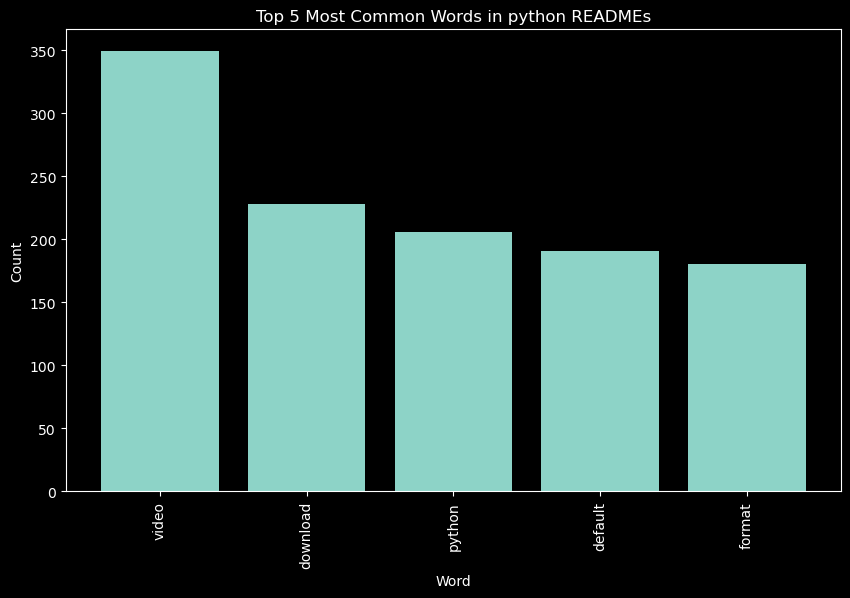

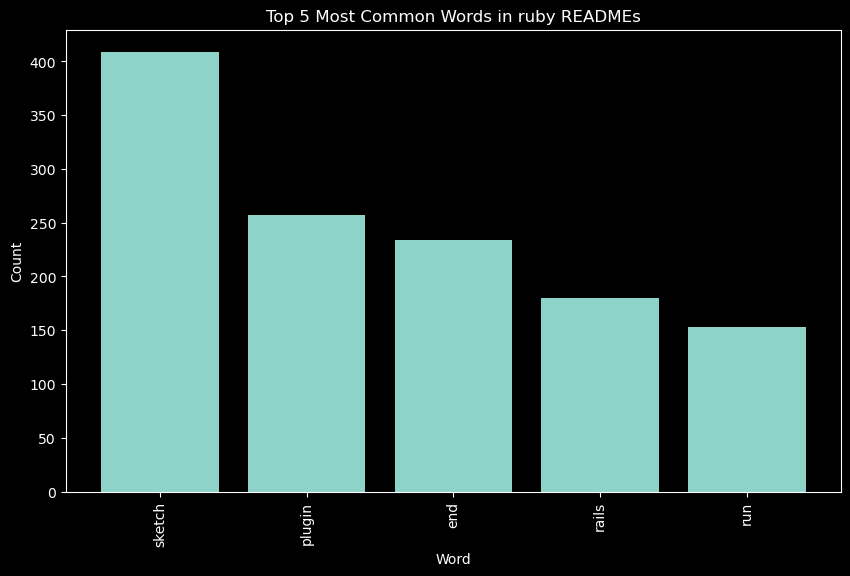

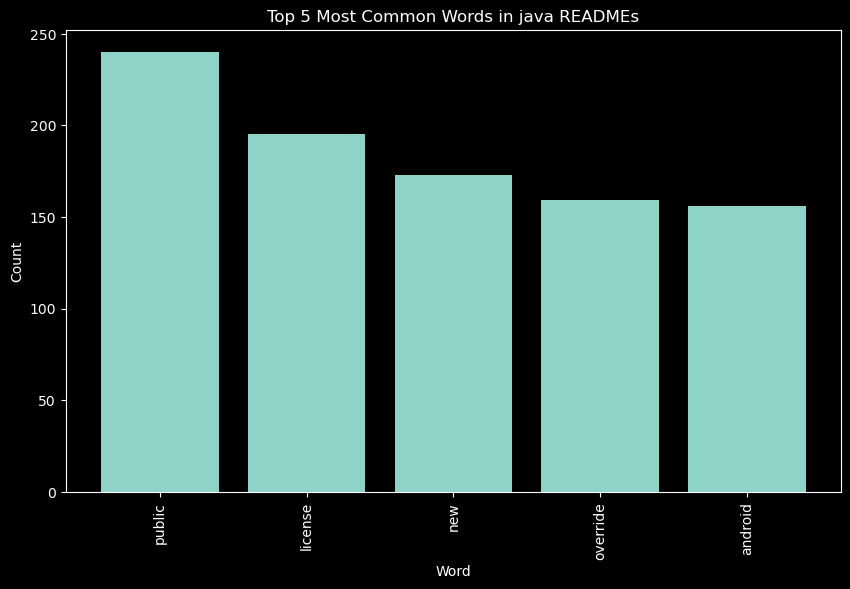

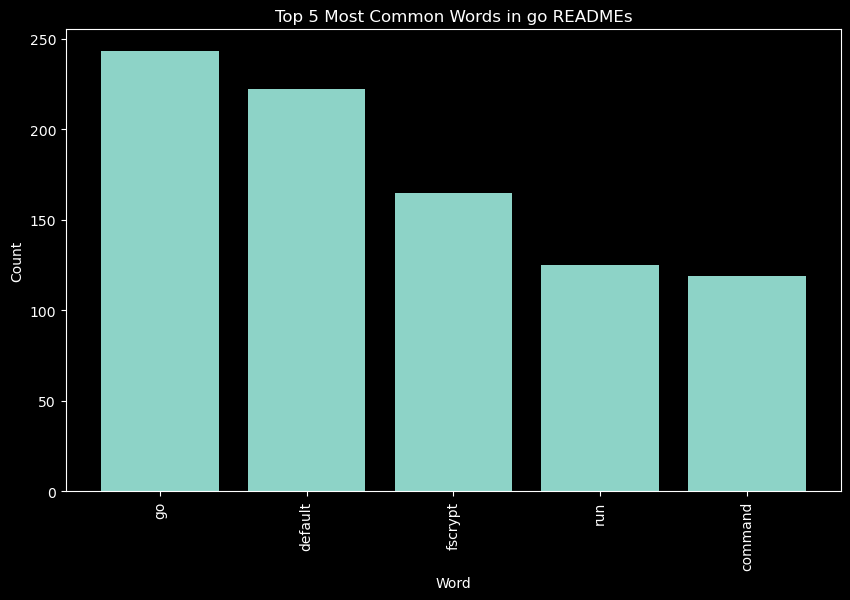

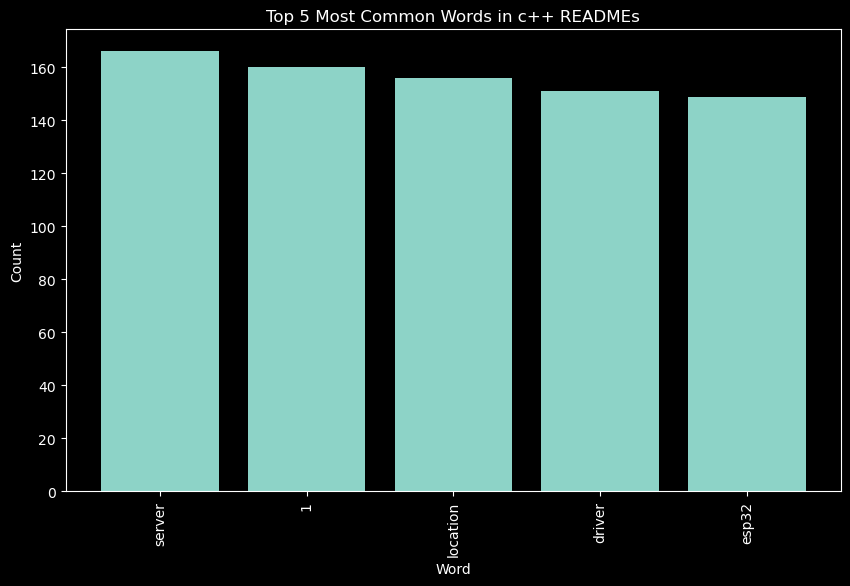

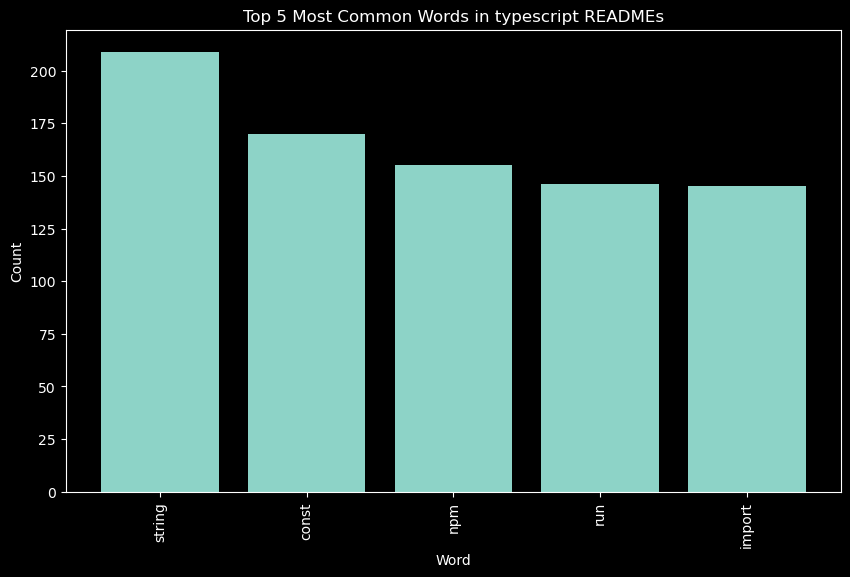

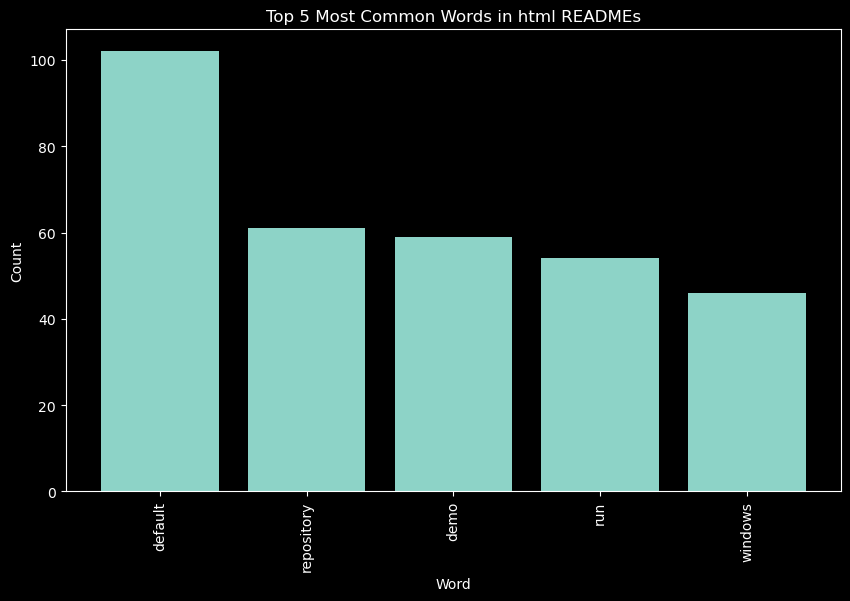

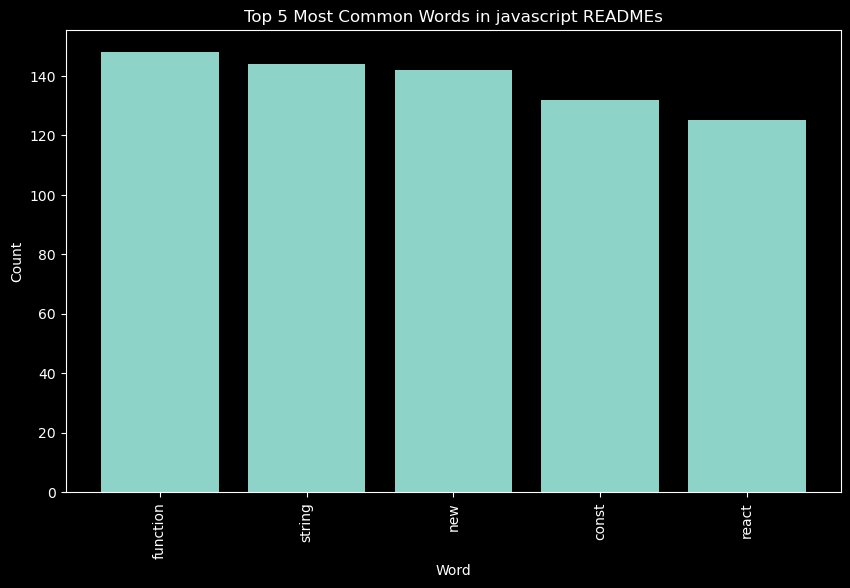

,Language,Word,Count
0,python,video,349
0,python,download,228
0,python,python,206
0,python,default,191
0,python,format,180
0,ruby,sketch,409
0,ruby,plugin,257
0,ruby,end,234
0,ruby,rails,180
0,ruby,run,153


In [14]:
# Plot 5 most common words for each language in the DF, using the function described above.
w.get_common_words(df, plot=True)

### Word Count Across All Languages

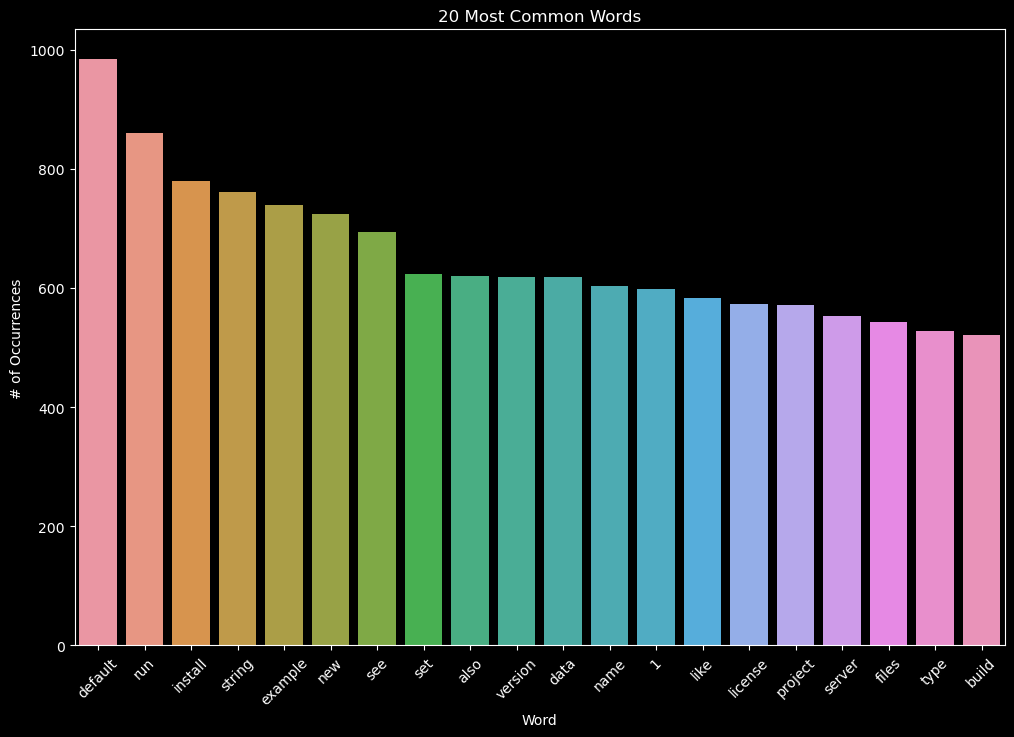

In [15]:
w.plot_top_words(df, num_words=20)

In [16]:
df

,language,repo,readme,preprocessed_readme
100,python,/ytdl-org/youtube-dl,\nyoutube-dl - download videos from youtube.co...,youtube dl download videos youtubecom video pl...
530,ruby,/tcopeland/pippi,Pippi\n\nPippi is a utility for finding subopt...,pippi pippi utility finding suboptimal ruby cl...
208,java,/ManuelPeinado/QuickReturnHeader,QuickReturnHeader\n###Introduction\nQuickRetur...,quickreturnheader introduction quickreturnhead...
600,go,/golang/go,The Go Programming Language\nGo is an open sou...,go programming language go open source program...
443,c++,/eycorsican/go-tun2socks,go-tun2socks\n\nA tun2socks implementation wri...,go tun2socks tun2socks implementation written ...
...,...,...,...,...
281,java,/mock-server/mockserver,MockServer \n\n \nDocumentation\...,mockserver documentation usage guide please se...
134,python,/smashwilson/slack-emojinator,Slack Emojinator\nBulk upload emoji into Slack...,slack emojinator bulk upload emoji slack want ...
462,c++,/slact/nchan,"\nhttps://nchan.io\nNchan is a scalable, flexi...",nchan scalable flexible pubsub server modern w...
418,c++,/dodola/BinderDebug,"Android Studio+LLDB调试内核Binder\n最近在研究Binder架构,由...",android studiolldb binder binder ...


#### Stats Testing and Specific Word Distribution

Since we are comparing the means of two variables with non-parametric data, we utilized the Mann-Whitney U test.

---

$H_0$: The distribution of `'data'` in `'python'` and `'java'` READMEs are equal. <br>

$H_a$: The distribution of `'data'` in `'python'` and `'java'` READMEs are <b><u> NOT </b></u> equal.

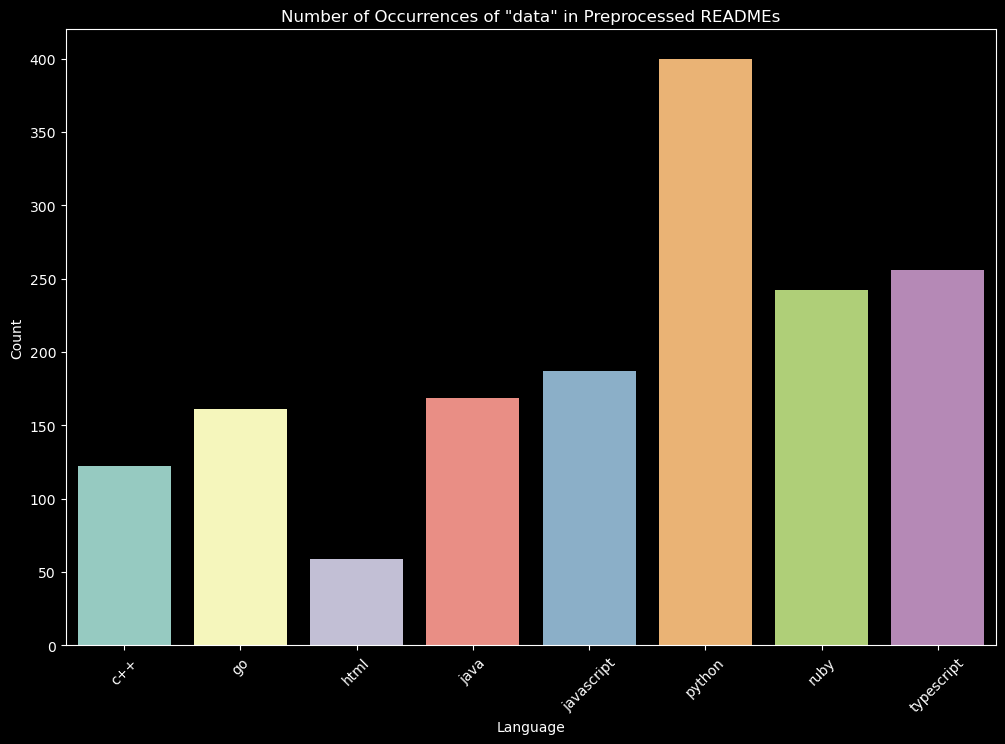

Mann-Whitney Test for 'data' between python and java:
  U-Stat = 2530.50
  p-value = 0.0001
  python count = 400
  java count = 169


In [17]:
w.plot_readme_word_counts(df, "data")
w.m_whitney_word_counts(df, "data", "python", "java")

<u> **We reject the null hypothesis. `'data'` has a higher occurence in `'python'` READMEs.** </u>

---

$H_0$: The distribution of `'run'` in `'go'` and `'java'` READMEs are equal. <br>

$H_a$: The distribution of `'run'` in `'go'` and `'java'` READMEs are <b><u> NOT </b></u> equal.

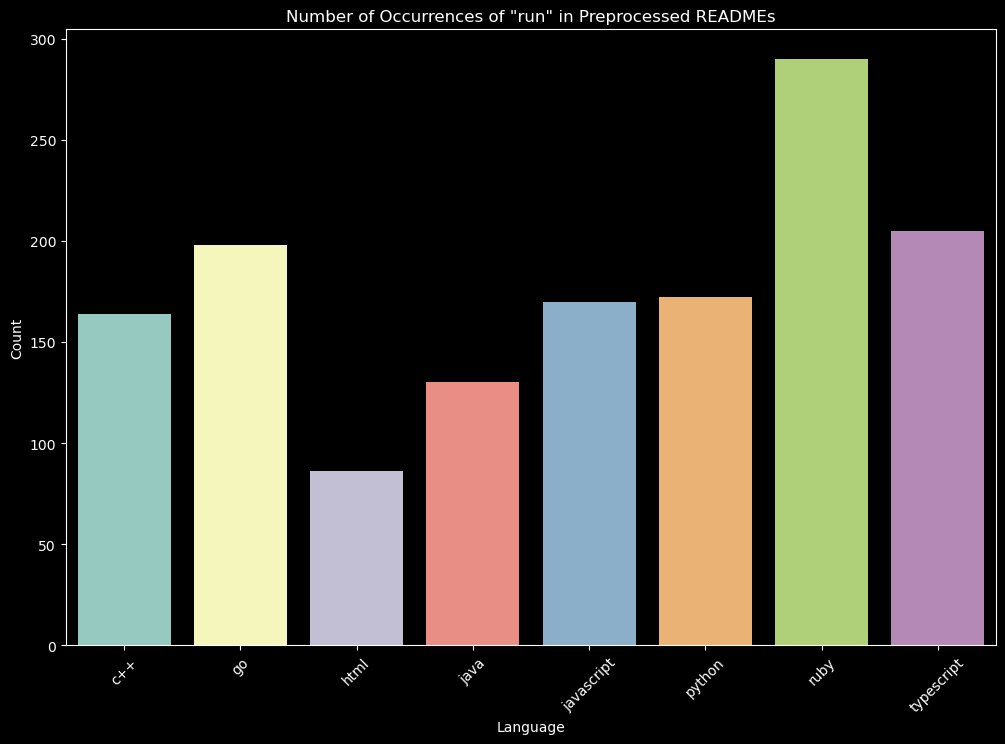

Mann-Whitney Test for 'run' between go and java:
  U-Stat = 1979.50
  p-value = 0.0002
  go count = 198
  java count = 130


In [18]:
w.plot_readme_word_counts(df, "run")
w.m_whitney_word_counts(df, "run", "go", "java")

<u> **We reject the null hypothesis. `'run'` has a higher occurence in `'go'` READMEs.** </u>

---

$H_0$: The distribution of `'new'` in `'java'` and `'html'` READMEs are equal. <br>

$H_a$: The distribution of `'new'` in `'java'` and `'html'` READMEs are <b><u> NOT </b></u> equal.

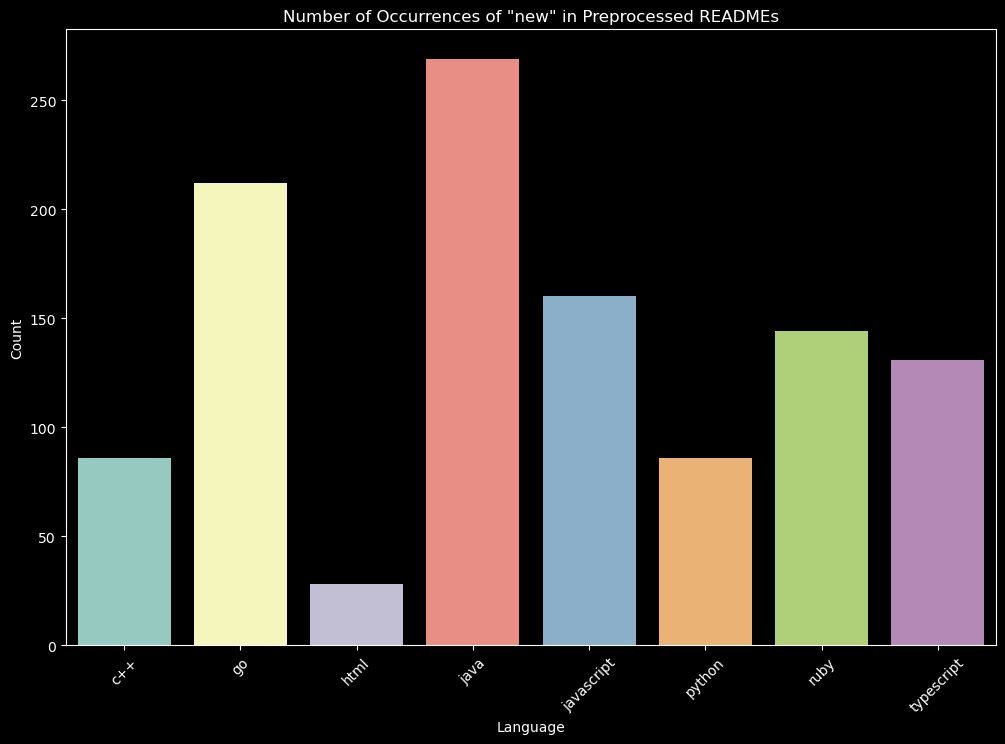

Mann-Whitney Test for 'new' between java and html:
  U-Stat = 1398.00
  p-value = 0.0057
  java count = 269
  html count = 28


In [19]:
w.plot_readme_word_counts(df, "new")
w.m_whitney_word_counts(df, "new", "java", "html")

<u> **We reject the null hypothesis. `'new'` has a higher occurence in `'java'` READMEs.** </u>

---

#### Word Cloud

<u>Not intended to provide any analytical value.</u><br>
This is only created for the title slide of the presentation for a surface level visualization.

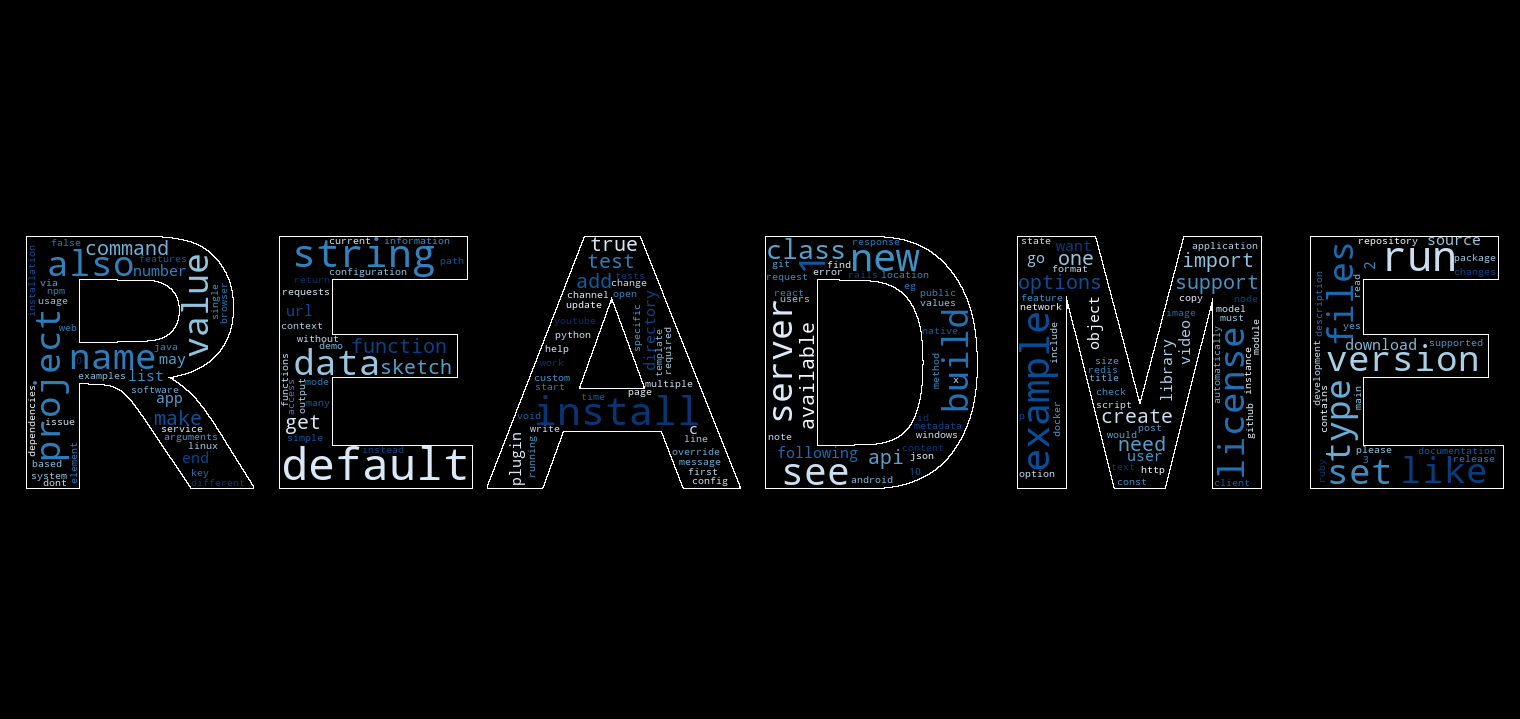

In [20]:
w.generate_wordcloud(df, word_count=300, text="README")

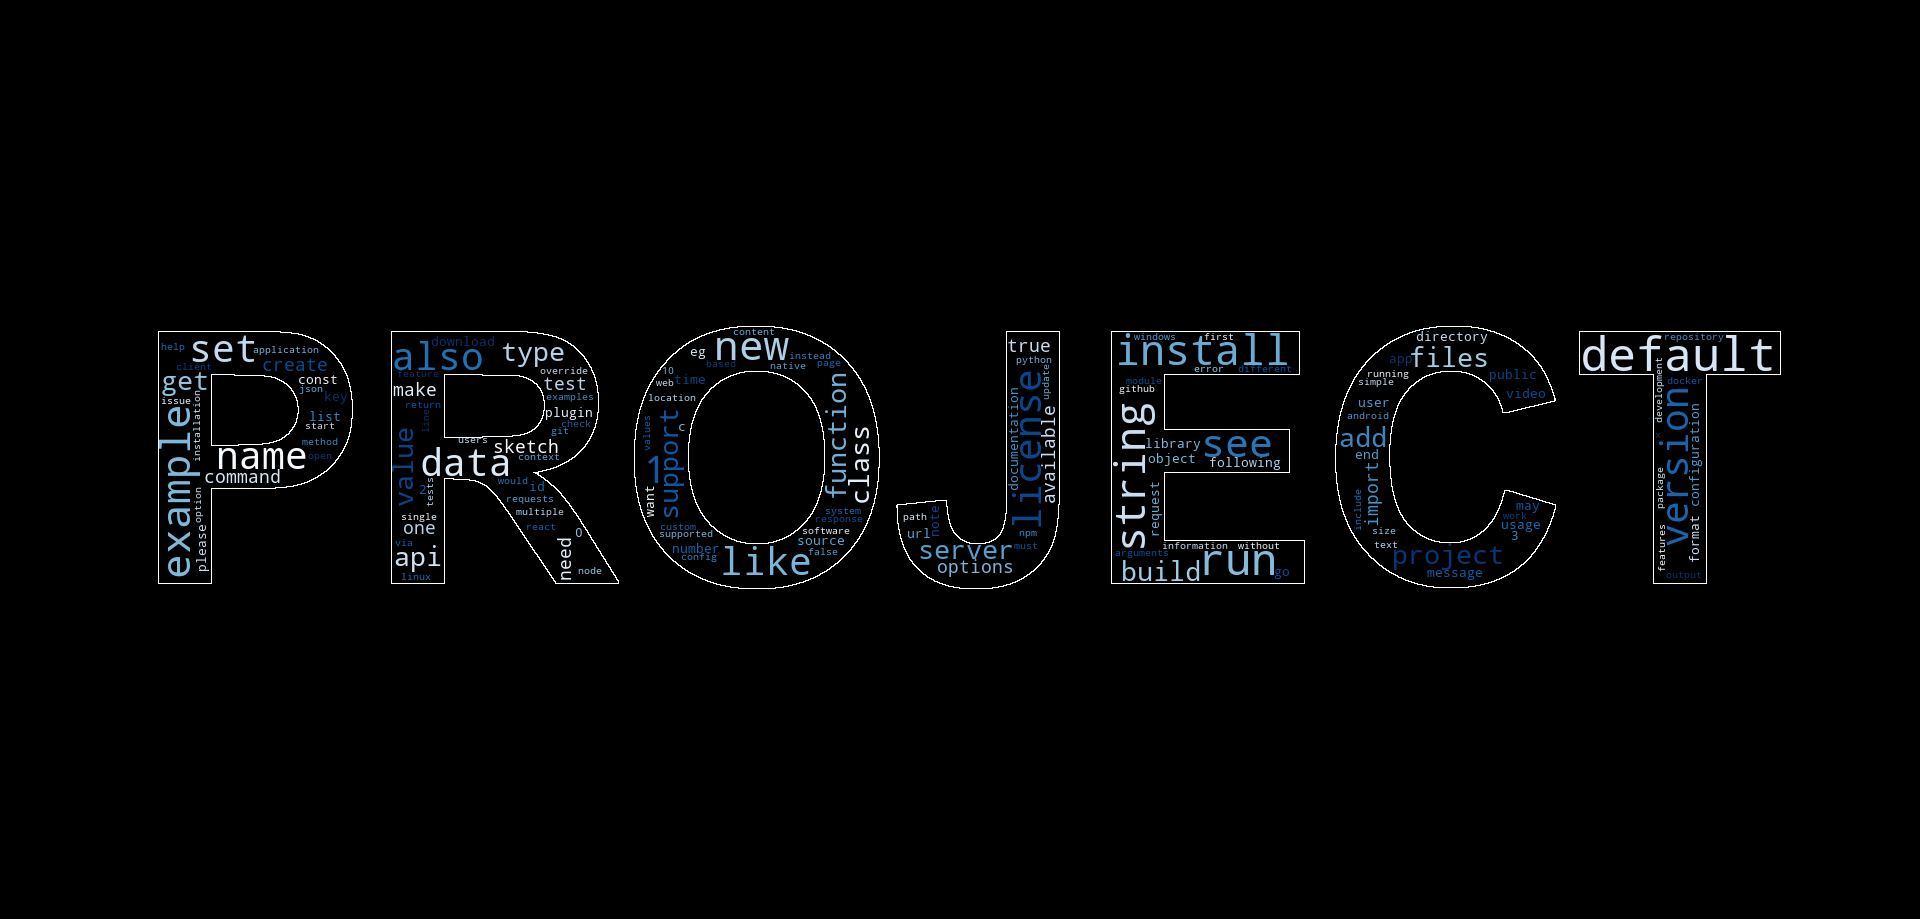

In [21]:
w.generate_wordcloud(
    df, word_count=300, text="PROJECT", fig_size=(30, 9), width=1900, height=900
)

### README Length by Programming Language

We'll visualize the distribution of README lengths for each programming language to determine if there's a noticeable difference.

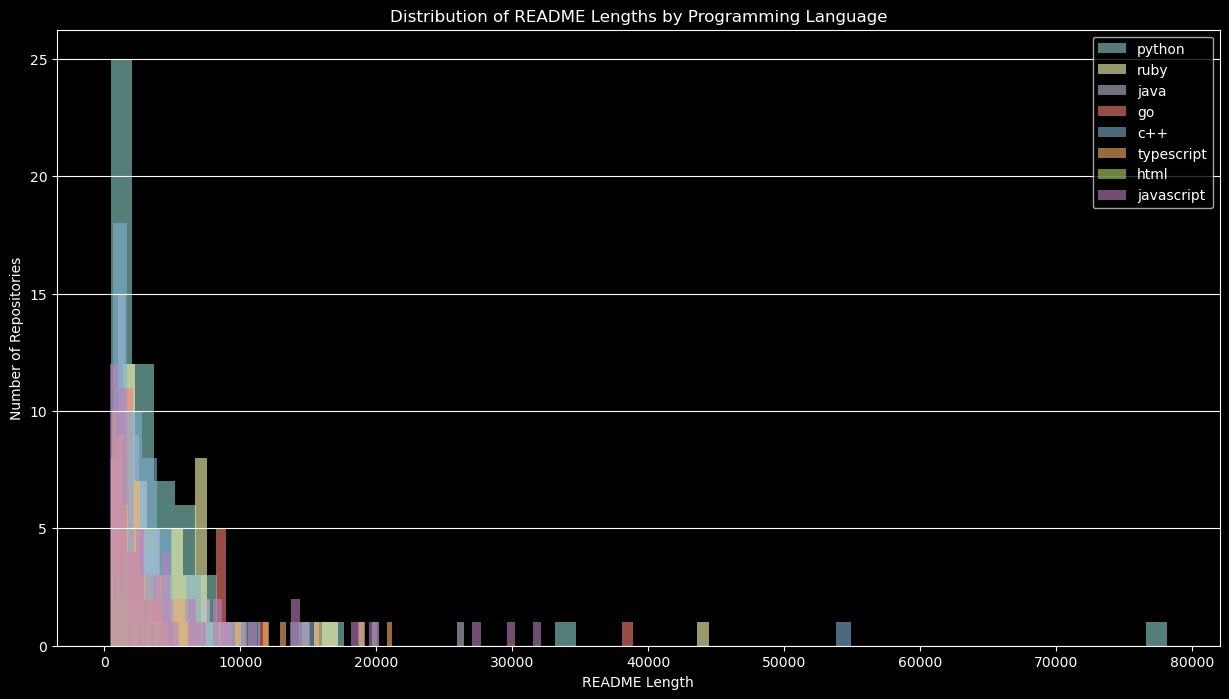

In [22]:
w.plot_readme_length_distribution(df)

              max  min         mean
language                           
c++         54910  607  4616.773585
go          38861  548  4890.545455
html         8549  479  2064.818182
java        26455  495  3593.296875
javascript  32137  409  5296.428571
python      78147  521  5131.929825
ruby        44448  494  4896.928571
typescript  21195  540  3621.051724


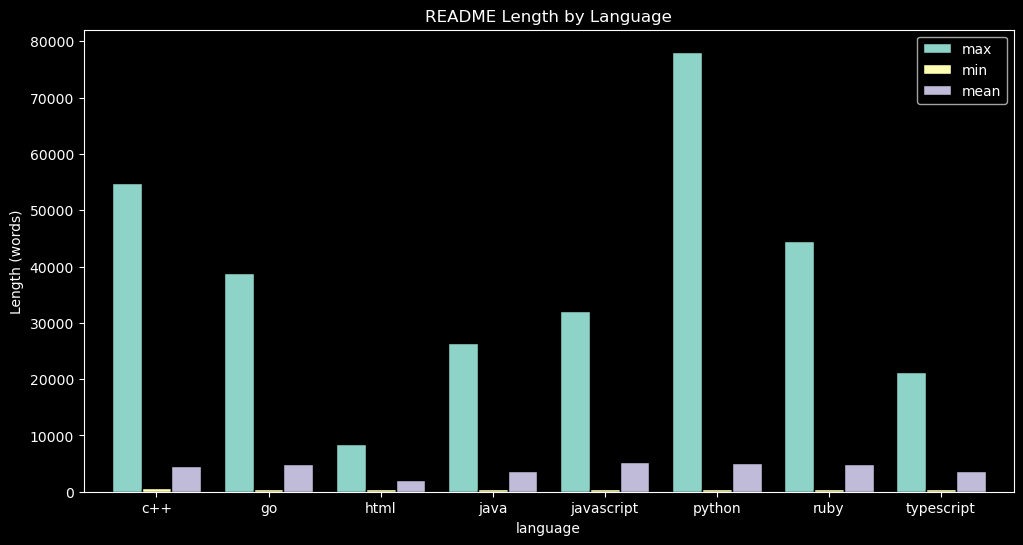

In [23]:
# Calculate the max, min, and mean README lengths by programming language
repos_summary = df.groupby("language")["readme_length"].agg(["max", "min", "mean"])

# Print the summary table
print(repos_summary)

# Plot the table
repos_summary.plot.bar(figsize=(12, 6), ec="black", width=0.8)
plt.title("README Length by Language")
plt.ylabel("Length (words)")
plt.xticks(rotation=0)
plt.show()

- We cut all repos below 50.

- Python has the longest repo, but seems to be an outlier.

- HTML has a very low max and mean. Seems fairly consistent acrossed repos.

### Number of Unique Words by Programming Language

We'll calculate the number of unique words used in READMEs for each programming language.

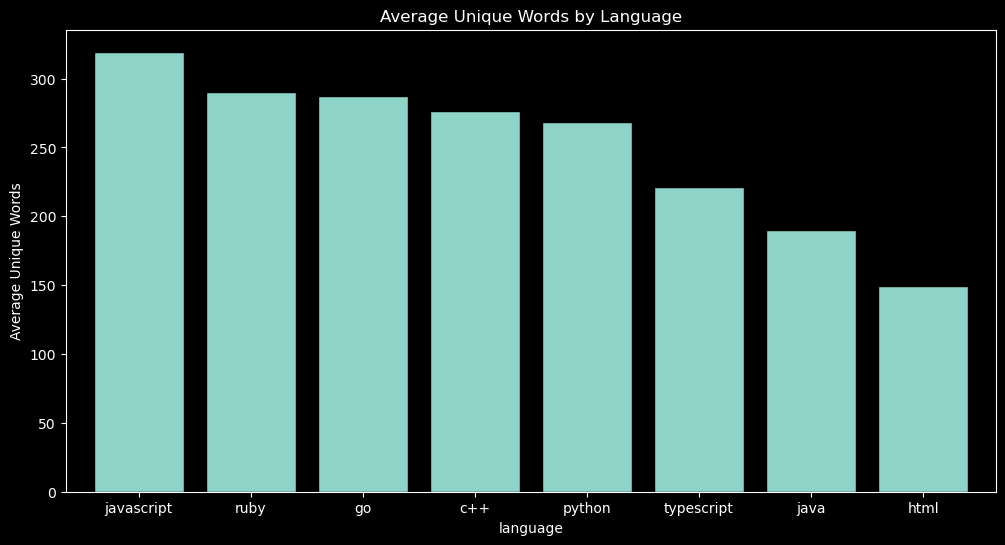

In [24]:
# Calculate the number of unique words for each README
df["unique_word_count"] = df["preprocessed_readme"].apply(lambda x: len(set(x.split())))

# Calculate the average number of unique words by programming language
avg_unique_words_by_language = (
    df.groupby("language")["unique_word_count"].mean().sort_values(ascending=False)
)

avg_unique_words_by_language

# Plot average unique words
avg_unique_words_by_language.plot.bar(figsize=(12, 6), ec="black", width=0.8)
plt.title("Average Unique Words by Language")
plt.ylabel("Average Unique Words")
plt.xticks(rotation=0)
plt.show()

JavaScript repositories tend to have the most diverse vocabulary in their READMEs, with an average of approximately 314 unique words.

C++, Ruby, and Python also have a relatively high number of unique words in their READMEs.

Java and HTML tend to have READMEs with a smaller vocabulary.

### Words Uniquely Identifying a Programming Language

We'll identify words that are highly prevalent in READMEs of one programming language but rare in READMEs of other languages.

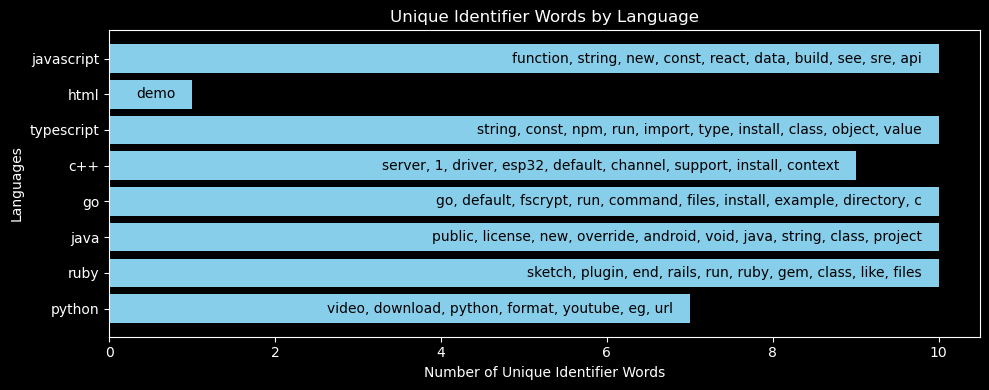

In [25]:
# Unique words in AT LEAST 10% of READMEs per language

w.plot_unique_identifier_words(df, threshold=0.1, n=10)

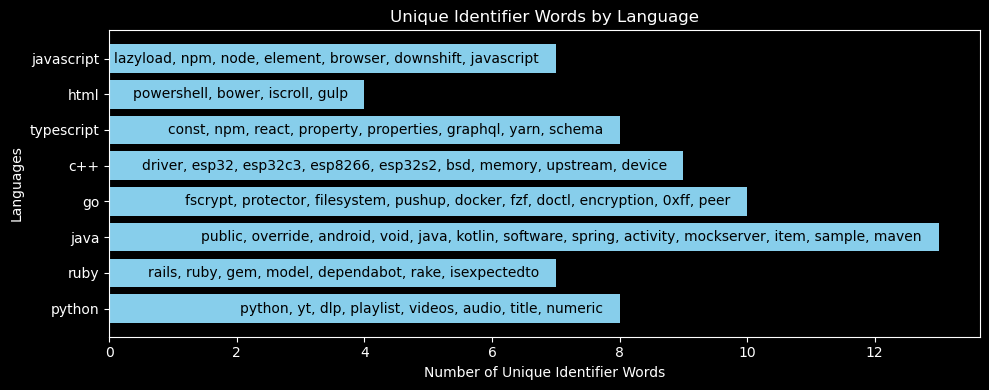

In [26]:
# Unique words in AT LEAST 25% of READMEs per language

w.plot_unique_identifier_words(df, threshold=0.25, n=50)

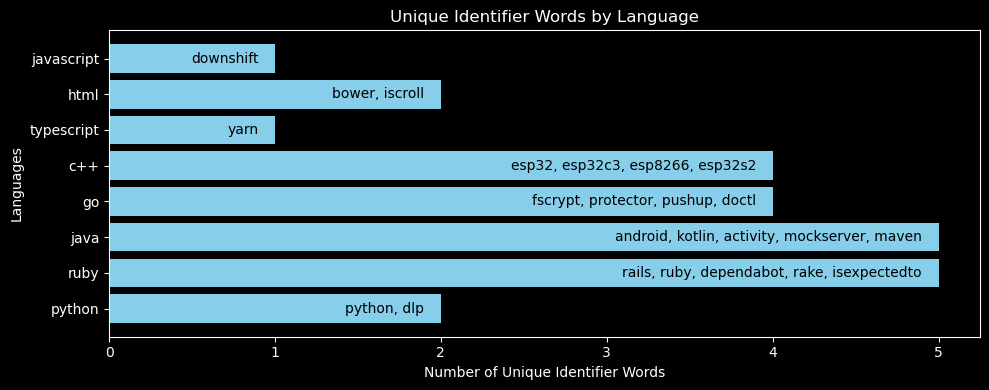

In [27]:
# Unique words in AT LEAST 50% of READMEs per language

w.plot_unique_identifier_words(df, threshold=0.5, n=50)

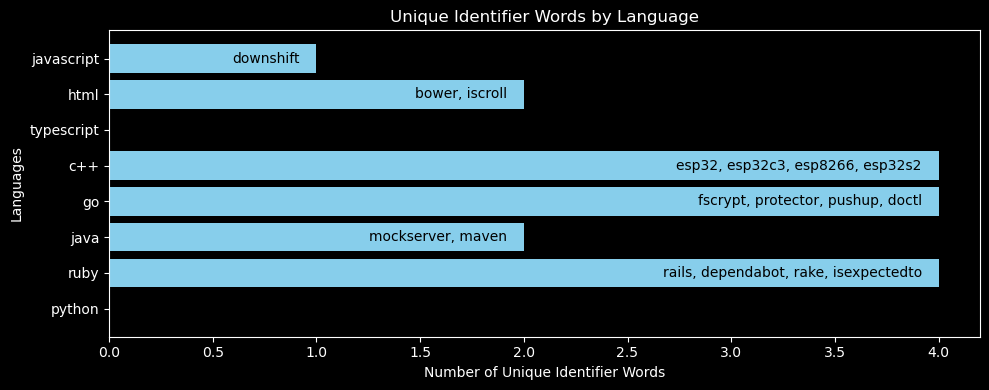

In [28]:
# Unique words in AT LEAST 75% of READMEs per language

w.plot_unique_identifier_words(df, threshold=0.75, n=50)

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

### Term Frequency-Inverse Document Frequency (TF-IDF) 

Useful hyperparameters for `TfidfVectorizer`:

- `max_features`: This hyperparameter controls the maximum number of features (i.e., terms) to include in the TF-IDF matrix. Setting this to a smaller value can help reduce the dimensionality of the matrix and improve performance, especially if the dataset is large.

- `min_df` and `max_df`: These hyperparameters control the minimum and maximum document frequency of terms to include in the TF-IDF matrix. Setting `min_df` to a higher value will exclude terms that appear in fewer than `min_df` documents, while setting `max_df` to a lower value will exclude terms that appear in more than `max_df` documents. These can be useful for removing very rare or very common terms that may not be informative.

- `ngram_range`: This hyperparameter controls the range of n-grams to include in the TF-IDF matrix. An n-gram is a contiguous sequence of n words in a document. Setting `ngram_range` to `(1, 1)` will include only unigrams (i.e., single words), while setting it to `(1, 2)` will include both unigrams and bigrams (i.e., pairs of words).

- `stop_words`: This hyperparameter can be set to a list of stop words to exclude from the TF-IDF matrix. Stop words are common words that are unlikely to be informative, such as "the", "and", and "of".

- `tokenizer`: This hyperparameter can be set to a custom tokenizer function to use instead of the default tokenizer. The tokenizer function should take a string as input and return a list of tokens (i.e., words).

These hyperparameters can be tuned to improve the performance of the TF-IDF vectorization for a specific task or dataset.

In [29]:
# Find the baseline to get a language correct
df.language.value_counts()

language
java          64
typescript    58
python        57
ruby          56
javascript    56
c++           53
go            44
html          33
Name: count, dtype: int64

In [31]:
# Find the baseline to get a language correct
df.language.value_counts(normalize=True)

language
java          0.152019
typescript    0.137767
python        0.135392
ruby          0.133017
javascript    0.133017
c++           0.125891
go            0.104513
html          0.078385
Name: proportion, dtype: float64

In [32]:
df.shape

(421, 6)

### X & Y Modeling Splits

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(
    read_me["preprocessed_readme"], read_me["language"], test_size=0.2, random_state=321
)

# Split the train set into train and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_validate, y_train_validate, test_size=0.25, random_state=123
)

# Print the shapes of the resulting datasets
print(f"Train Size:      X: {X_train.shape[0]}, Y: {y_train.shape[0]}")
print(f"Validation Size: X: {X_validate.shape[0]}, Y: {y_validate.shape[0]}")
print(f"Test Size:       X: {X_test.shape[0]}, Y: {y_test.shape[0]}")

Train Size:      X: 421, Y: 421
Validation Size: X: 141, Y: 141
Test Size:       X: 141, Y: 141


### Baseline: 13%

### The cell below has been converted to markdown so it will not run. 

Convert back to Python in the bottom right to run GridSearch again.

The cell below is the results from the GridSearch

```python

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Create a pipeline
pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("logreg", LogisticRegression(max_iter=1000, random_state=321)),
    ]
)

# Define the parameter grid
param_grid = {
    "tfidf__max_features": [50, 250, 500, 750, 1000],
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "tfidf__min_df": [10, 25, 50, 250, 500],
    "tfidf__max_df": [25, 50, 100, 250, 500],
    "logreg__C": [0.1, 1, 10],
    "logreg__penalty": ["l1", "l2"],
}

# Initialize GridSearchCV with return_train_score=True
grid_search = GridSearchCV(
    pipeline, param_grid, cv=2, n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Calculate the train-validation score gap for each parameter combination
results["score_gap"] = results["mean_train_score"] - results["mean_test_score"]

# Print the results
print(results[["params", "mean_train_score", "mean_test_score", "score_gap"]])

```

```python

# Trim GridSearch DF down to what we need

results_trimmed = results[
    ["score_gap", "mean_test_score", "mean_train_score", "params"]
]

# Round all results to 2 decimals

results_trimmed = results_trimmed.round(5)

# Show highest test score, then lowest score gap, where test score >= X

results_trimmed[
    (results_trimmed["mean_test_score"] >= 0.3)
    & (results_trimmed["score_gap"] <= 0.3)
].sort_values(by=["mean_test_score", "score_gap"], ascending=[False, True])

In [34]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=250, max_features=500, min_df=25, ngram_range=(1, 2))
X = tfidf.fit_transform(df["preprocessed_readme"])
y = df["language"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=321)
logit.fit(X_train, y_train)

# Calculate the accuracy of the model
print(f"Logistic Regression Train Accuracy: {logit.score(X_train, y_train)}")

Logistic Regression Train Accuracy: 0.9079365079365079


In [35]:
print(f"Logistic Regression Test Accuracy: {logit.score(X_test, y_test)}")

Logistic Regression Test Accuracy: 0.6132075471698113


### Process to Save Our Models for Reapplying

*converted to raw to not export new model files*

```python

import pickle

# Save the TfidfVectorizer object
with open("support_files/tfidf_vectorizer2.pkl", "wb") as file:
    pickle.dump(pipeline.named_steps['tfidf'], file)

# Save the LogisticRegression object
with open("support_files/logreg_model2.pkl", "wb") as file:
    pickle.dump(pipeline.named_steps['logreg'], file)

## Function(ize) It

## Testing the Functions (With our pulled Repos)

In [36]:
w.predict_language()

Random String: r net implementation keras repository attempt reproduce results presented technical report microsoft research asia report describes complex neural network called r net designed question answering blogpost describes details r net currently august 25 2017 best single model stanford qa database squad squad dataset uses two performance metrics exact match em f1 score f1 human performance estimated em823 f1912 test set report describes two versions r net first one called r net wang et al 2017 refers paper yet available online reaches em713 f1797 test set consists input encoders modified version match lstm self matching attention layer main contribution paper pointer network second version called r net march 2017 one additional bigru self matching attention layer pointer network reaches em723 f1807 current best single model squad leaderboard higher score means r net development continued march 2017 ensemble models reach higher scores repository contains implementation first ve

In [37]:
w.predict_language(readme_string="license public new void")

Predicted: java (Score: 0.73)

Other possible predictions:
c++: 0.05
typescript: 0.05


In [38]:
# Read in our README

readme = requests.get(
    "https://raw.githubusercontent.com/Zacharia-Schmitz/nlp_project/main/README.md"
).text

In [39]:
w.predict_language(readme_string=readme)

Predicted: python (Score: 0.44)

Other possible predictions:
c++: 0.12
javascript: 0.10


## Add model predictions to DF

In [40]:
# Add a column named prediction, that adds the model prediction to the dataframe
df["prediction"] = logit.predict(X)

In [41]:
# What percentage of language = prediction
(df.language == df.prediction).mean()

0.833729216152019

In [42]:
# Format for export
prediction_df = df[["language", "prediction", "readme"]]

```python

# Export predictions
prediction_df.to_csv('support_files/predictions.csv', index=False)

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---

### Takeaways

- Some Repositories Have Multiple Languages

- Read up on scraping/API policy beforehand

- Cache along the way

### Recommendations

#### For Modeling:

- **Feature Engineering:** Consider extracting additional features from the README text, such as the number of code snippets, mentions of specific libraries, and the use of certain punctuations typical to a programming language.

- **Ensemble Methods:** Combine multiple models for better prediction. For instance, a combination of logistic regression, random forests, and gradient boosting might yield improved results.

- **Deep Learning:** Explore deep learning techniques like RNNs or Transformers (e.g., BERT) which can capture sequential information in the text and might improve accuracy.

#### For Data Collection:

- **Diversify Sources:** To avoid biases, collect READMEs from various sources, not just popular repositories, to ensure a diverse representation of projects and languages.

- **Update Data Periodically:** Languages and their ecosystems evolve. Ensure the dataset is updated periodically to reflect recent trends and libraries.

### Next Steps:

- **Validation:** Set up a validation framework to periodically test the model on new READMEs and ensure its predictions remain accurate over time.

- **Expand Scope:** Beyond predicting programming languages, consider expanding the project's scope to categorize projects based on their purpose (e.g., web development, data analysis, gaming).

- **Topic Modeling:** Beyond just predicting the language, perform topic modeling on READMEs to identify common themes or topics within specific language communities.